### Proyek 1 Machine Learning Terapan
### Mobile Price Prediction


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [4]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


# Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- battery_power = Total energy a battery can store in one time measured in mAh
- blue = Has bluetooth or not
- clock_speed = speed at which microprocessor executes instructions
- dual_sim = Has dual sim support or not
- fc = Front Camera mega pixels
- four_g = Has 4G or not
- int_memory = Internal Memory in Gigabytes
- m_dep = Mobile Depth in cm
- mobile_wt = Weight of mobile phone
- n_cores = Number of cores of processor
- pc = Primary Camera mega pixels
- px_hieght = Pixel Resolution Height
- px_width = Pixel Resolution Width
- ram = Random Access Memory in Megabytes
- sc_h = Screen Height of mobile in cm
- sc_w = Screen Width of mobile in cm
- talk_time = longest time that a single battery charge will last when you are
- three_g = Has 3G or not
- touch_screen = Has touch screen or not
- wifi = Has wifi or not
- price_range = This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Handling Missing Value

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Handling Duplicate Value

In [8]:
df.duplicated().sum()

0

### Univariate Analysis

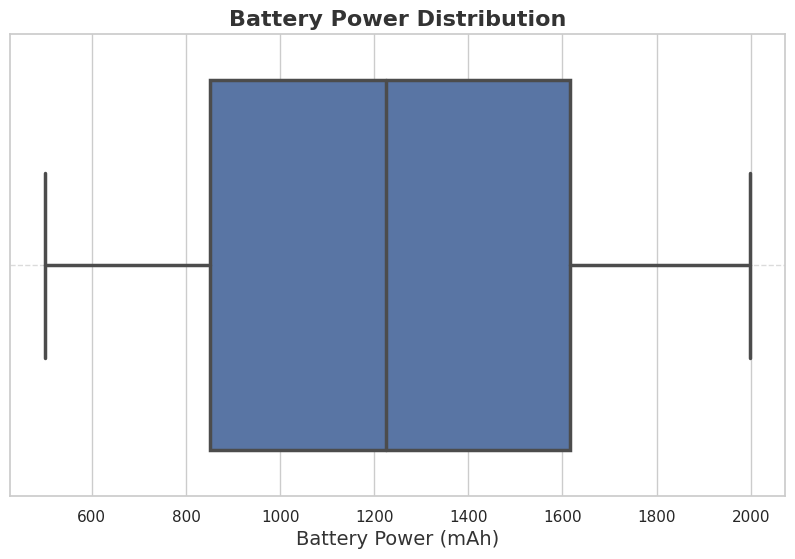

In [9]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['battery_power'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Battery Power Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Battery Power (mAh)", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

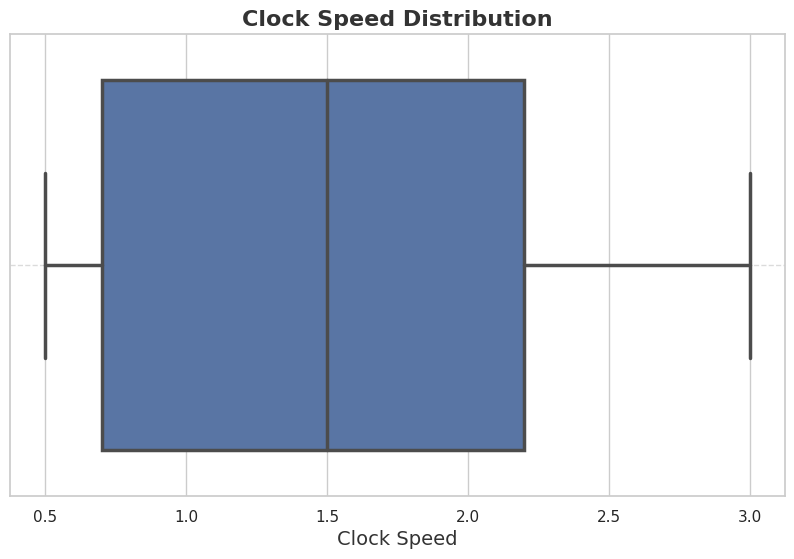

In [10]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['clock_speed'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Clock Speed Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Clock Speed", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

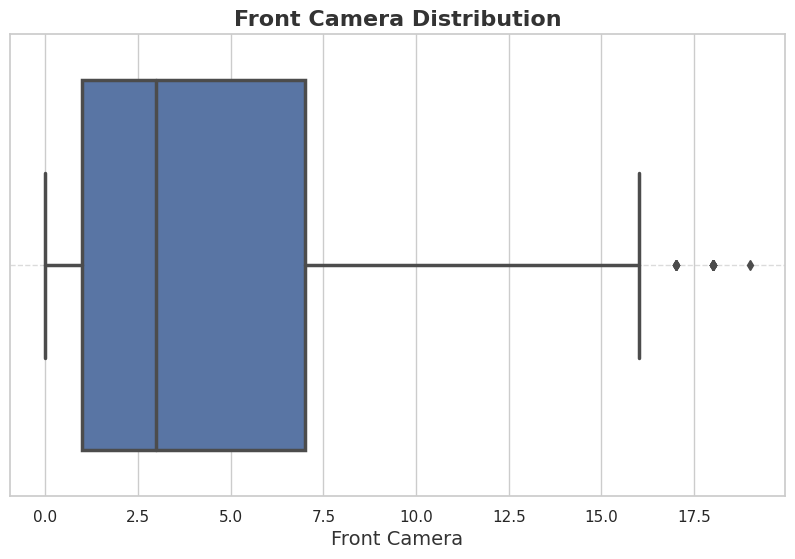

In [11]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['fc'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Front Camera Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Front Camera", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

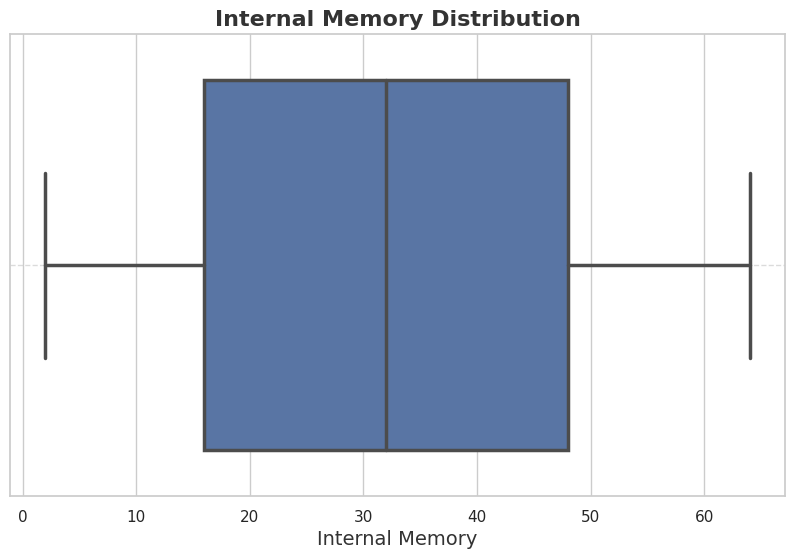

In [12]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['int_memory'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Internal Memory Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Internal Memory", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

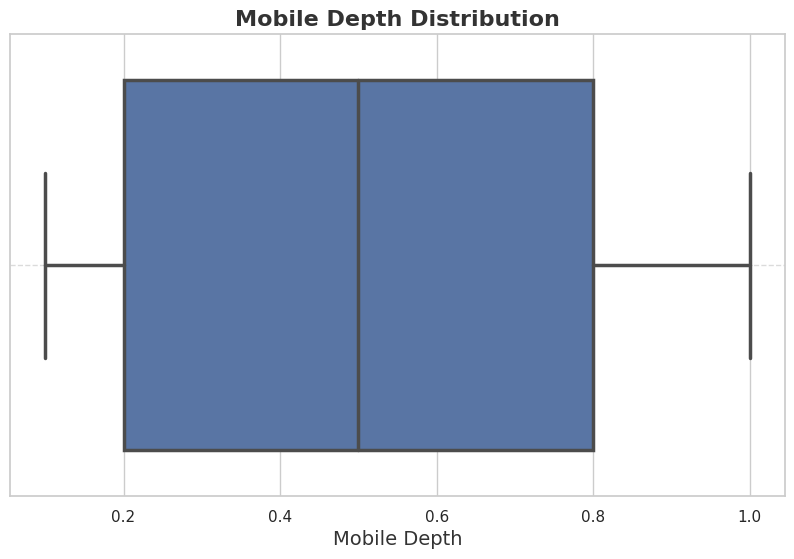

In [13]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['m_dep'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Mobile Depth Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Mobile Depth", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

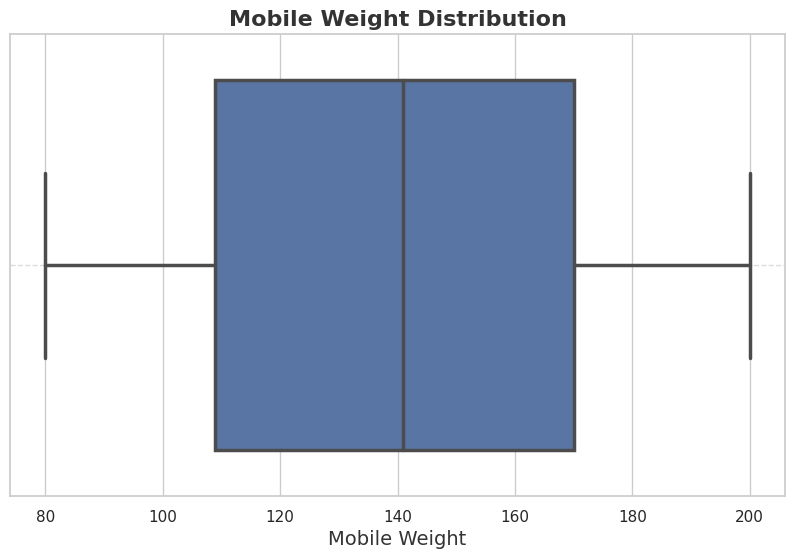

In [14]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['mobile_wt'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Mobile Weight Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Mobile Weight", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

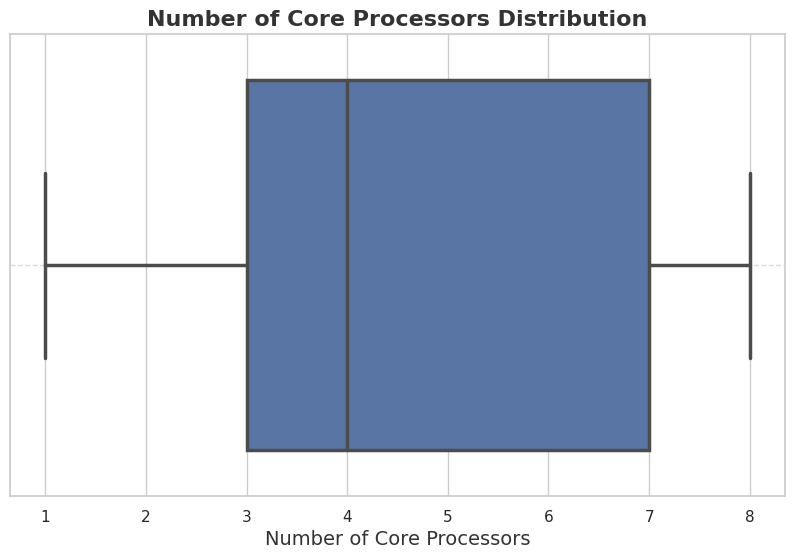

In [15]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['n_cores'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Number of Core Processors Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Number of Core Processors", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

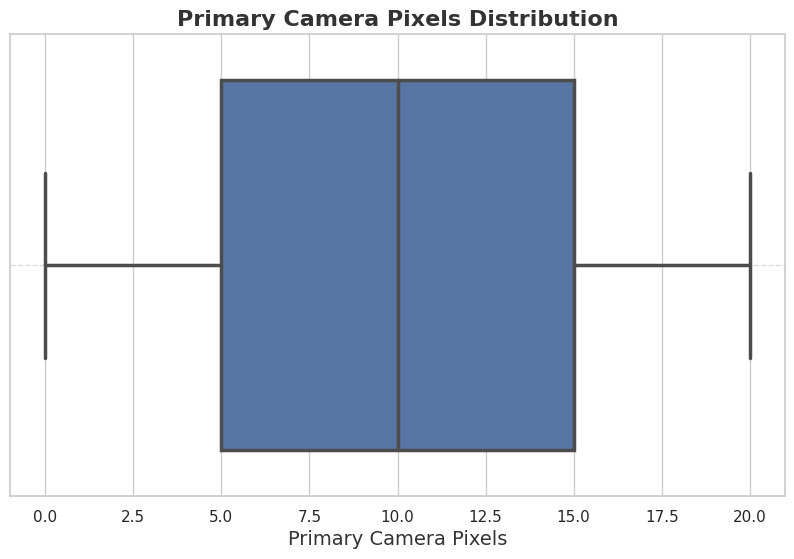

In [16]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['pc'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Primary Camera Pixels Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Primary Camera Pixels", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

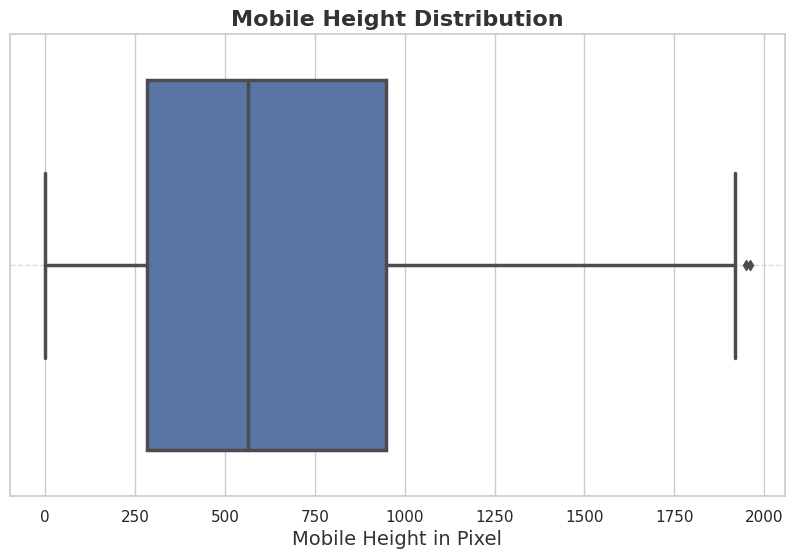

In [17]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['px_height'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Mobile Height Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Mobile Height in Pixel", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

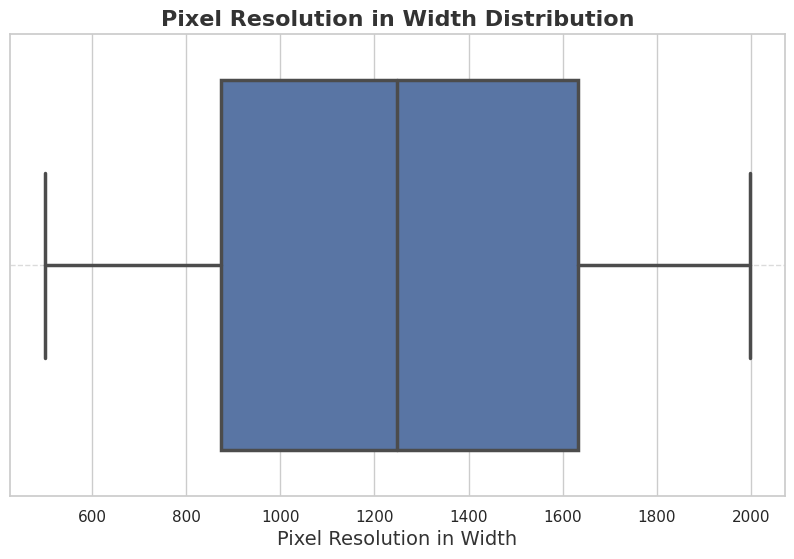

In [18]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['px_width'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Pixel Resolution in Width Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Pixel Resolution in Width", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

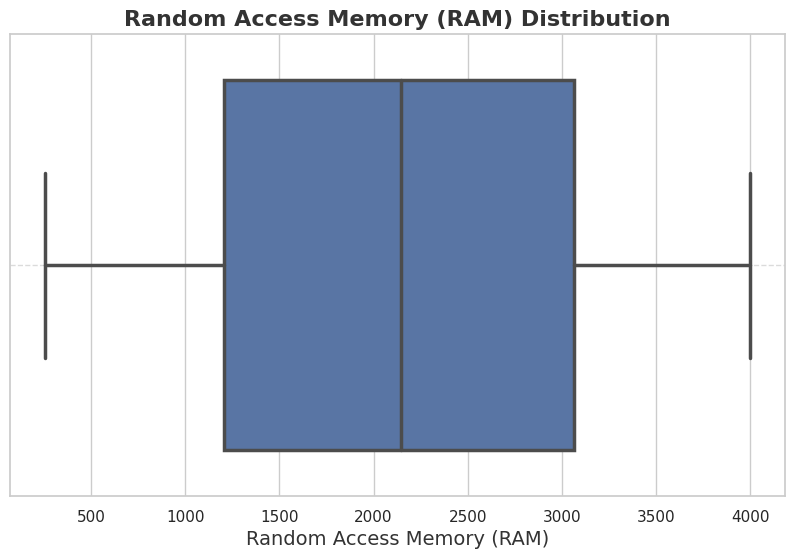

In [19]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['ram'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Random Access Memory (RAM) Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Random Access Memory (RAM)", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

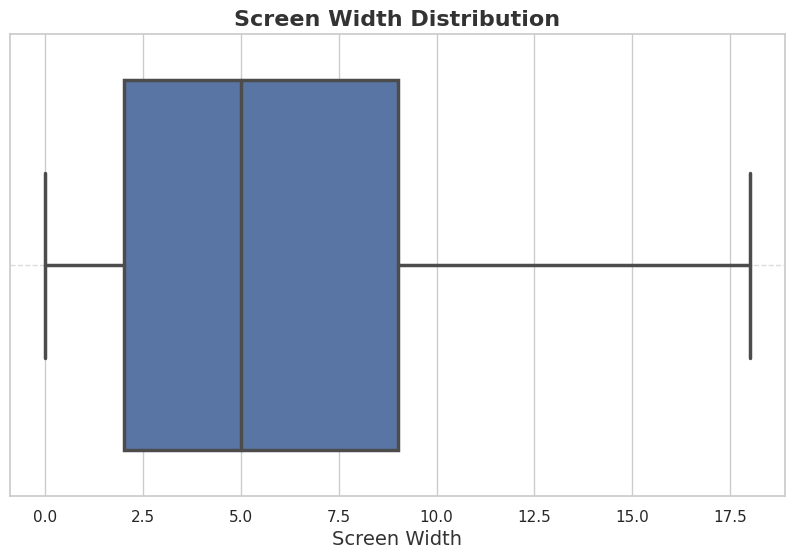

In [20]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['sc_w'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Screen Width Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Screen Width", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

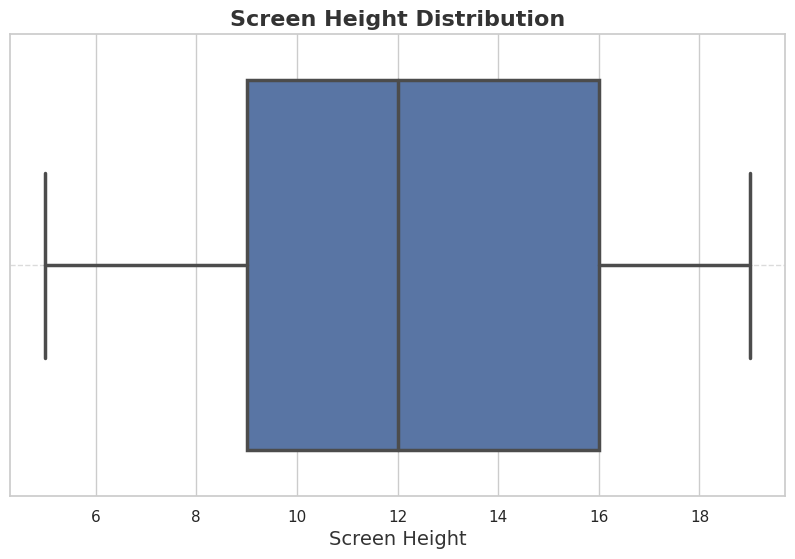

In [21]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['sc_h'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Screen Height Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Screen Height", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

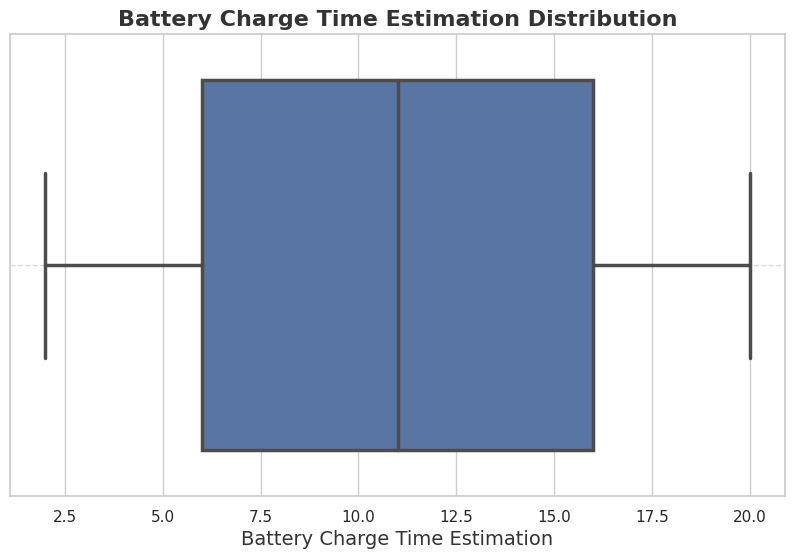

In [23]:
# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Membuat Boxplot dengan Custom Style
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    x=df['talk_time'], 
    color='#4C72B0', 
    saturation=0.75, 
    linewidth=2.5
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Battery Charge Time Estimation Distribution", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Battery Charge Time Estimation", fontsize=14, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Boxplot
plt.show()

Dapat dilihat pada setiap variabel(yang valuenya bukan 0 atau 1), cenderung memiliki distribusi normal. Walaupun ada beberapa variabel yang memiliki outlier, tetapi jumlah outliernya tidak banyak. Kemungkinan, data ini merupakah Mobile Phone yang memang memiliki fitur yang cukup unik dibanding dengan data mobile phone yang lain

### Univariate Analysis

**Categorical Features**

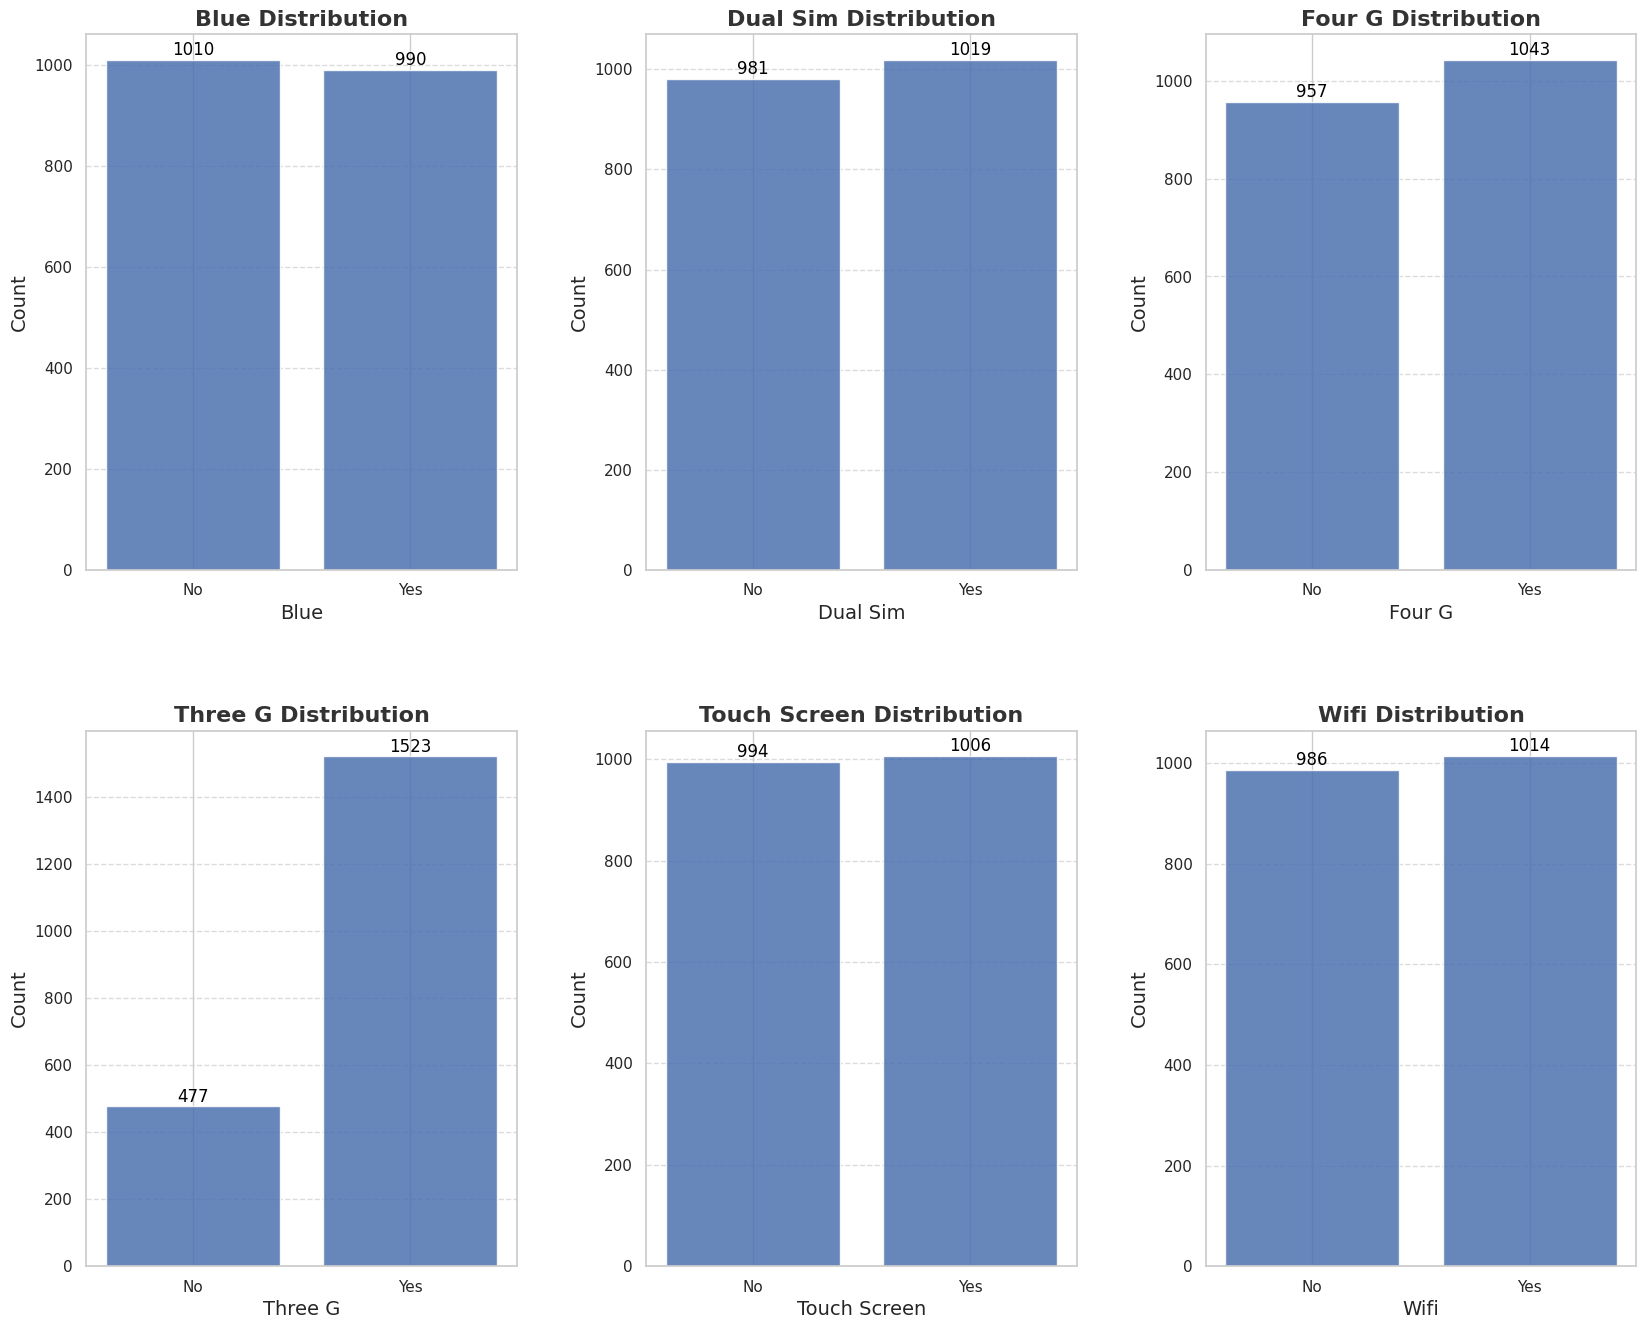

In [25]:
# List Kategori yang Ingin Divisualisasikan
cat_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Styling Seaborn
sns.set(style='whitegrid', palette='pastel')

# Ukuran Figure dan Layout Subplot
plt.figure(figsize=(20, 16))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Membuat Subplot untuk Setiap Kategori
for i, col in enumerate(cat_features):
    plt.subplot(2, 3, i + 1)
    count_data = df[col].value_counts().sort_index()
    
    # Bar Plot dengan Warna yang Konsisten
    bars = plt.bar(count_data.index, count_data.values, color='#4C72B0', alpha=0.85)
    
    # Tambahkan Angka di Atas Setiap Bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), 
                 ha='center', va='bottom', fontsize=12, color='black')
    
    # Memberi Title dan Label yang Lebih Informatif
    plt.title(f'{col.replace("_", " ").title()} Distribution', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel(col.replace("_", " ").title(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks([0, 1], labels=['No', 'Yes'])  # Label untuk 0 dan 1
    
    # Grid Horizontal untuk Membantu Membaca Nilai
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Visualisasi
plt.show()

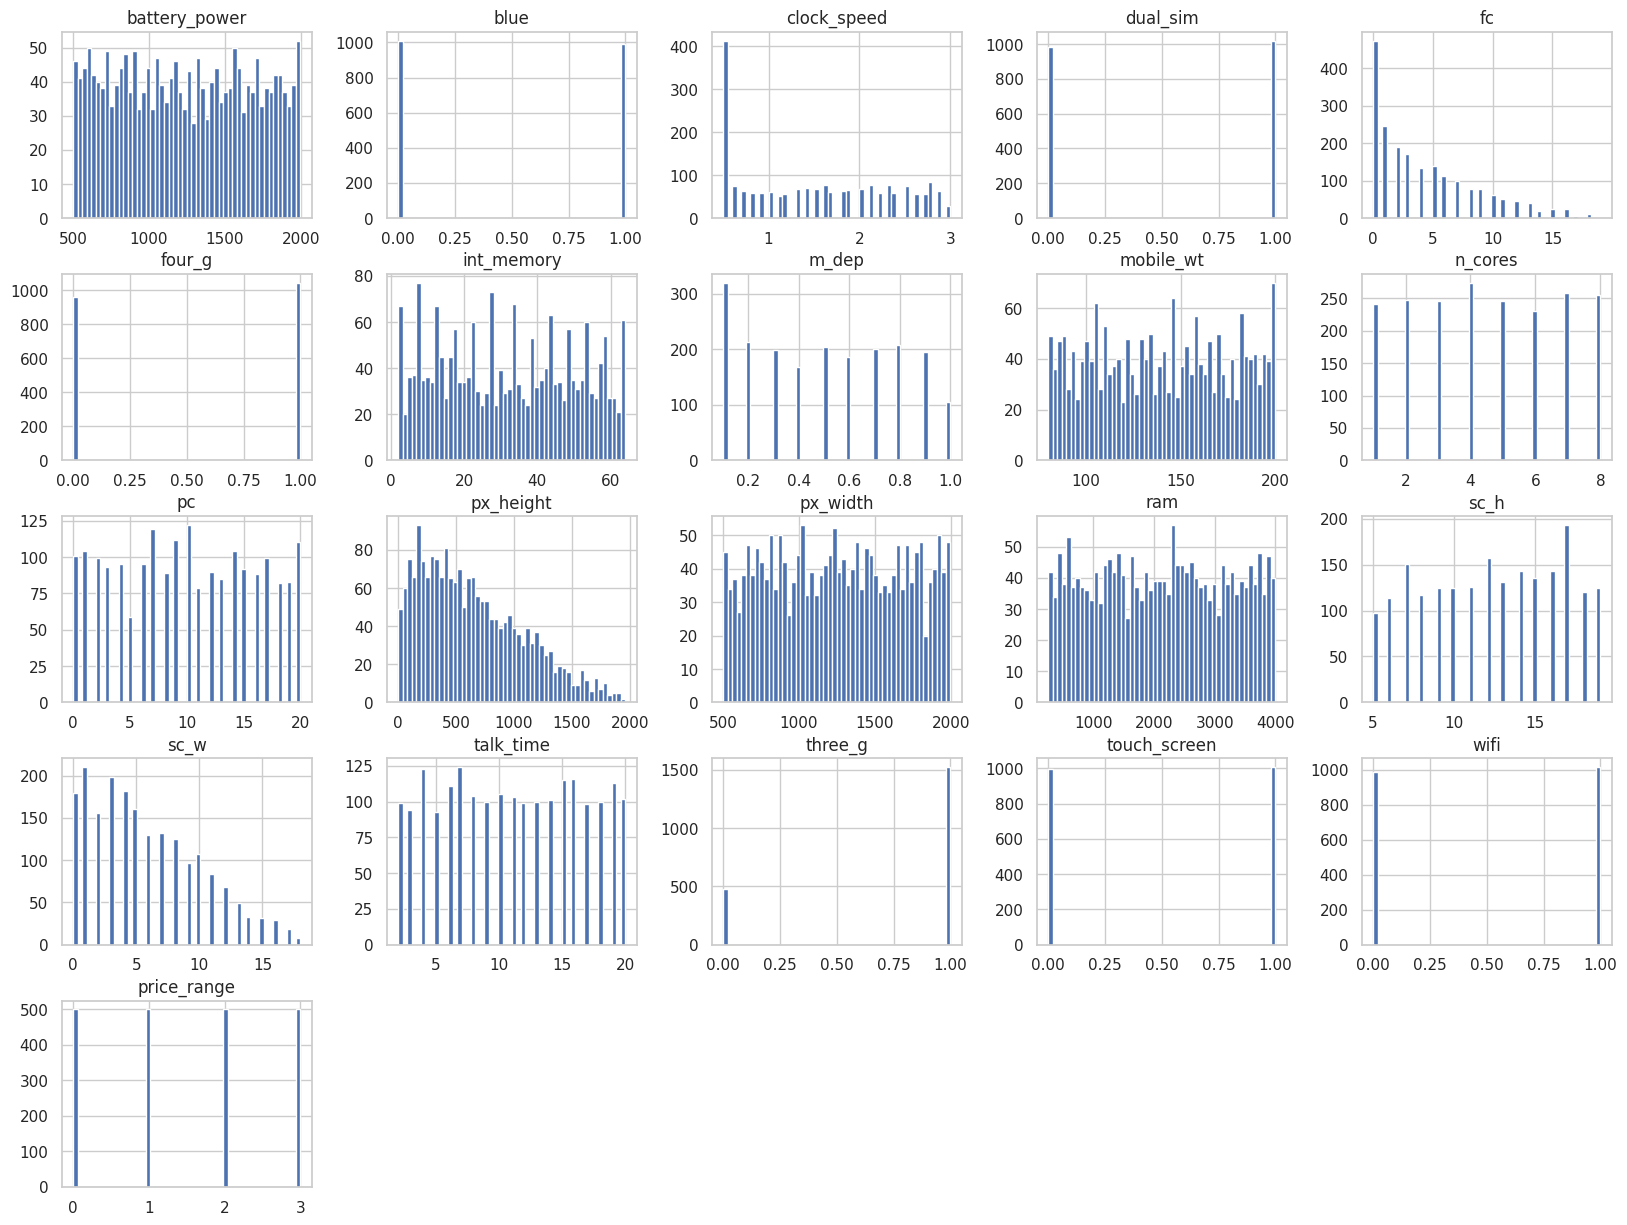

In [29]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

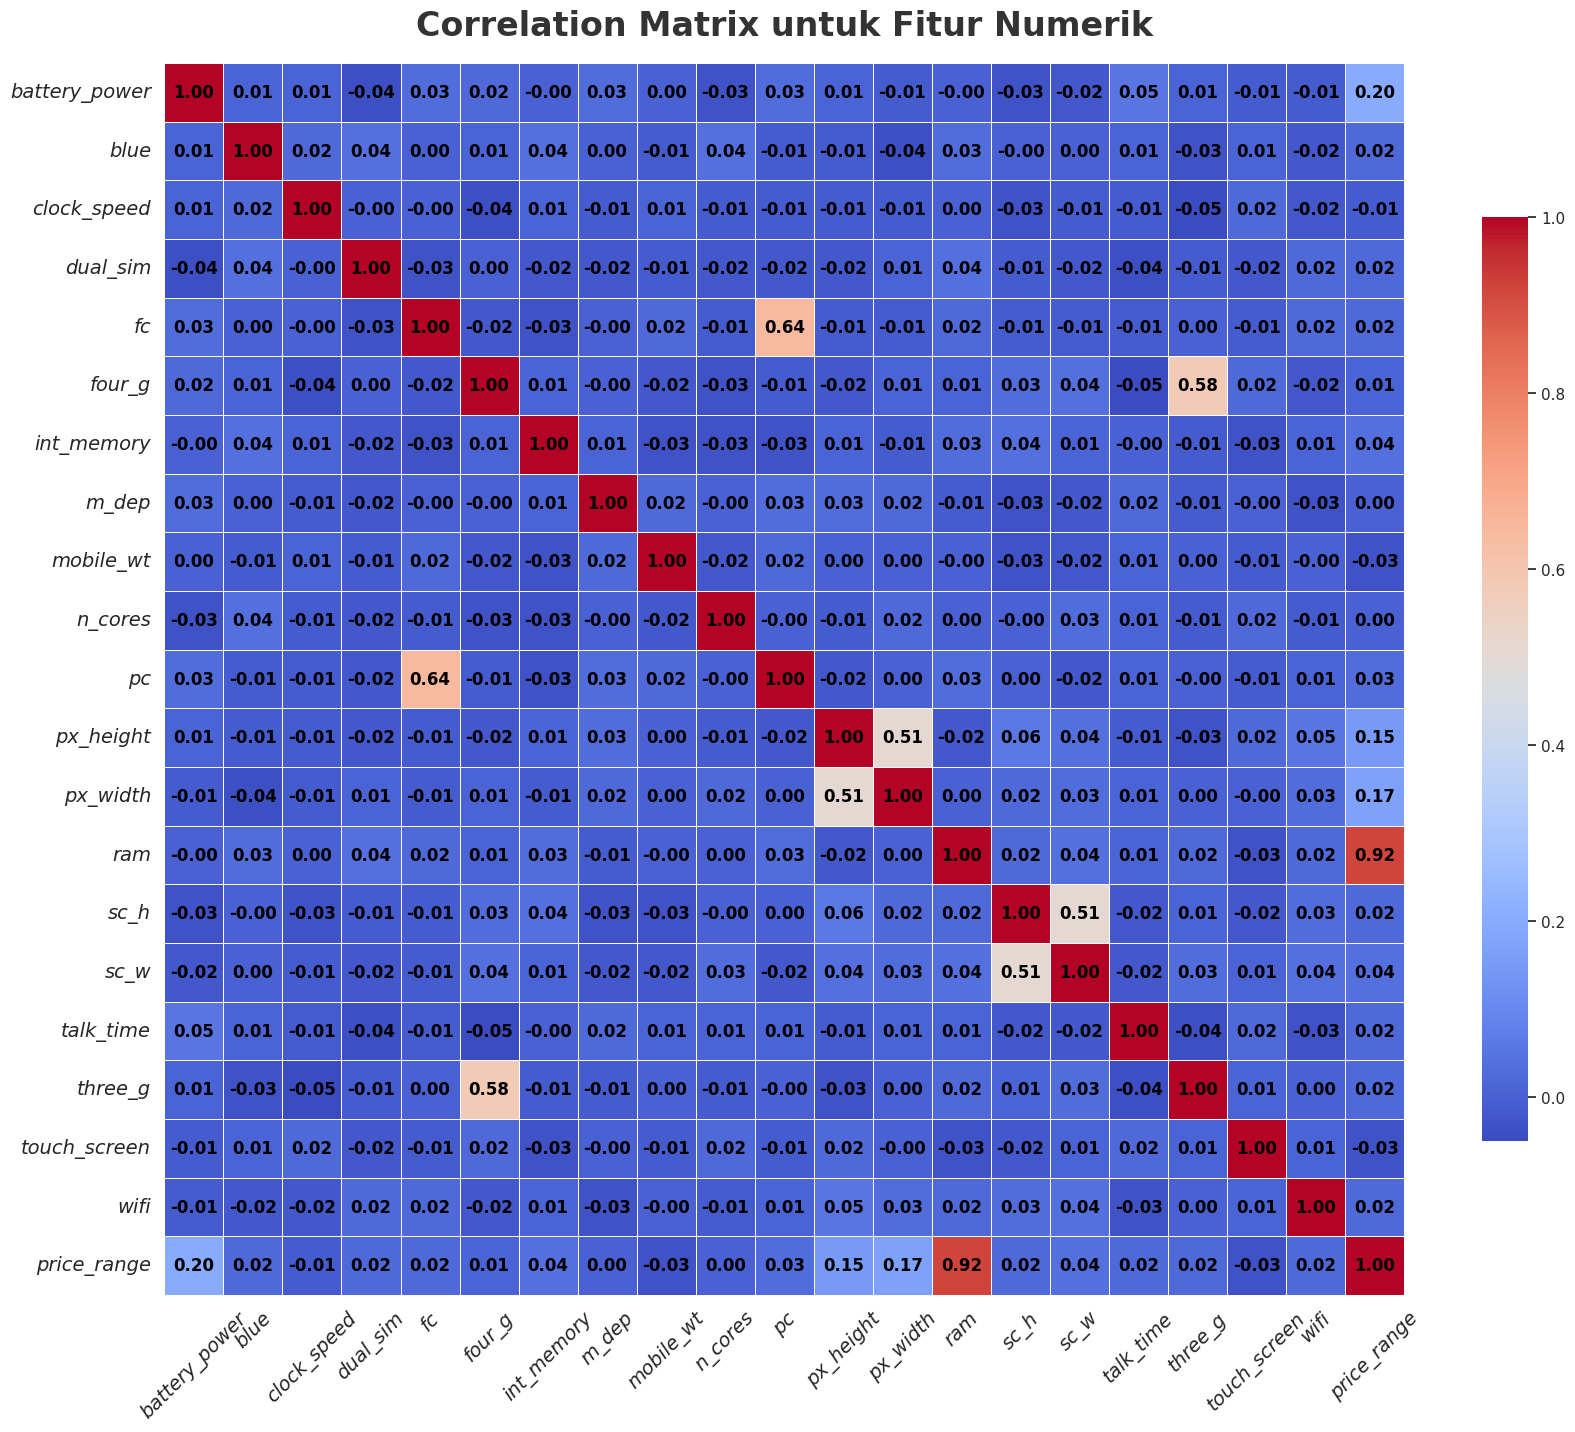

In [30]:
# Styling Seaborn
sns.set(style='whitegrid')

# Ukuran Figure
plt.figure(figsize=(20, 16))

# Membuat Correlation Matrix
correlation_matrix = df.corr().round(2)

# Membuat Heatmap dengan Gaya yang Lebih Menarik
heatmap = sns.heatmap(
    data=correlation_matrix,
    annot=True,
    fmt=".2f",                       # Format angka desimal 2 digit
    cmap='coolwarm',                  # Warna gradasi yang elegan
    cbar_kws={'shrink': 0.75},        # Ukuran color bar yang lebih kecil
    linewidths=0.5,                   # Garis pembatas antar kotak
    linecolor='white',                # Warna garis pembatas
    annot_kws={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}
)

# Memberi Title dan Label yang Lebih Informatif
plt.title("Correlation Matrix untuk Fitur Numerik", fontsize=24, fontweight='bold', color='#333333', pad=20)
plt.xticks(fontsize=14, rotation=45, fontstyle='italic')
plt.yticks(fontsize=14, rotation=0, fontstyle='italic')

# Menampilkan Heatmap
plt.show()

Dapat dilihat dalam correlation matrix, 

- beberapa variabel tidak memiliki korelasi (0 korelasi), contohnya m_dep,n_cores
- beberapa variabel yang korelasinya sangat rendah, contohnya clock_speed,four_g
- beberapa variabel yang cukup rendah korelasinya, contohnya blue, dual_sim, fc, int_memory, mobile_wt, pc, sc_h, sc_w, talk_time, three_g, touch_screen, wifi
- beberapa variabel yang tinggi korelasinya, contohnya battery_power, px_height, px_width, ram

Untuk variabel yang tidak memiliki korelasi dan sangat rendah korelasinya, saya tidak akan pakai

# Data Preparation

In [31]:
df = df.drop(columns=['m_dep','n_cores','clock_speed','four_g'])
df.head(10)

,battery_power,blue,dual_sim,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,0,1,7,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,1,0,53,136,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,1,2,41,145,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,0,13,44,141,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,1,3,22,164,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,0,4,10,139,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,1,0,24,187,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0,0,53,174,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,1,2,9,93,15,1137,1224,513,19,10,12,1,0,0,0


In [32]:
X = df.drop(columns=['price_range'])
Y = df['price_range']

X.head()

,battery_power,blue,dual_sim,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,0,1,7,188,2,20,756,2549,9,7,19,0,0,1
1,1021,1,1,0,53,136,6,905,1988,2631,17,3,7,1,1,0
2,563,1,1,2,41,145,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,0,13,44,141,14,1208,1212,1411,8,2,15,1,1,0


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y, test_size=0.1, random_state = 42) 

In [35]:
x_train[0]

array([0.83099532, 0.        , 0.        , 0.        , 0.01612903,
       0.20833333, 0.        , 0.21734694, 0.75367156, 0.28113308,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        ])

In [36]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1800
Total # of sample in test dataset: 200


In [37]:
print(f'Total # of sample in whole dataset: {len(Y)}')
print(f'Total # of sample in train dataset: {len(y_train)}')
print(f'Total # of sample in test dataset: {len(y_test)}')

Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1800
Total # of sample in test dataset: 200


# Model Development

In [38]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix
)

# Import Models
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [40]:
# Function for Evaluation Metrics and Plotting
def evaluate_and_plot(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Display Classification Report
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return acc, prec, rec, f1

# List to Store Evaluation Results
results = []


--- CatBoost ---
Accuracy: 0.9500
Precision: 0.9502
Recall: 0.9500
F1-Score: 0.9495

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       0.96      0.96      0.96        49
           2       0.95      0.87      0.91        45
           3       0.92      0.96      0.94        47

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



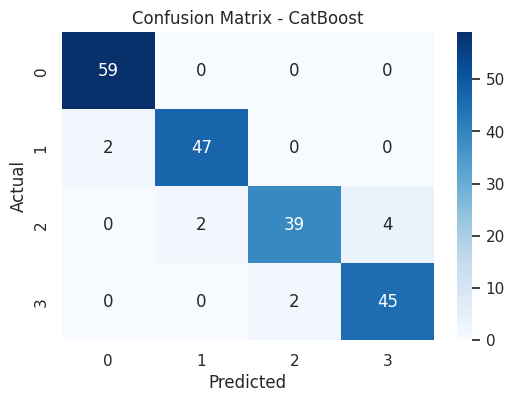

In [41]:
# 1. CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.5, depth=6, verbose=0, random_seed=42)
catboost_model.fit(x_train, y_train)
results.append(
    ('CatBoost', *evaluate_and_plot(catboost_model, 'CatBoost', x_test, y_test))
)


--- AdaBoost ---
Accuracy: 0.7250
Precision: 0.7659
Recall: 0.7250
F1-Score: 0.7235

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.61      0.71        59
           1       0.62      0.82      0.70        49
           2       0.66      0.91      0.77        45
           3       0.93      0.60      0.73        47

    accuracy                           0.73       200
   macro avg       0.76      0.73      0.73       200
weighted avg       0.77      0.72      0.72       200



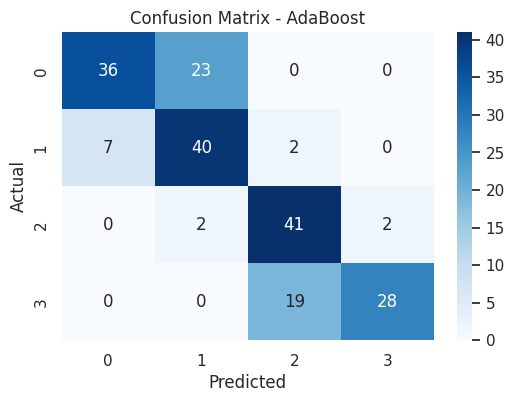

In [42]:
# 2. AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
adaboost_model.fit(x_train, y_train)
results.append(
    ('AdaBoost', *evaluate_and_plot(adaboost_model, 'AdaBoost', x_test, y_test))
)


--- Random Forest ---
Accuracy: 0.8800
Precision: 0.8806
Recall: 0.8800
F1-Score: 0.8790

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.91      0.80      0.85        49
           2       0.80      0.80      0.80        45
           3       0.86      0.94      0.90        47

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



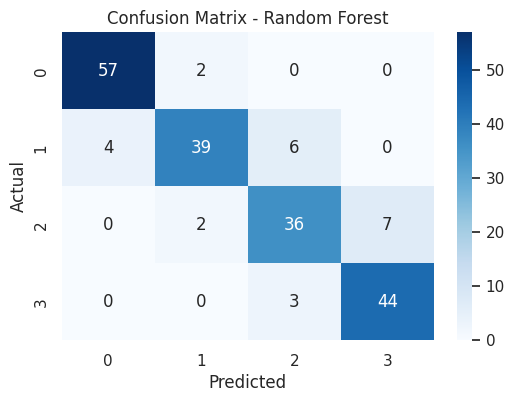

In [43]:
# 3. Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
random_forest_model.fit(x_train, y_train)
results.append(
    ('Random Forest', *evaluate_and_plot(random_forest_model, 'Random Forest', x_test, y_test))
)

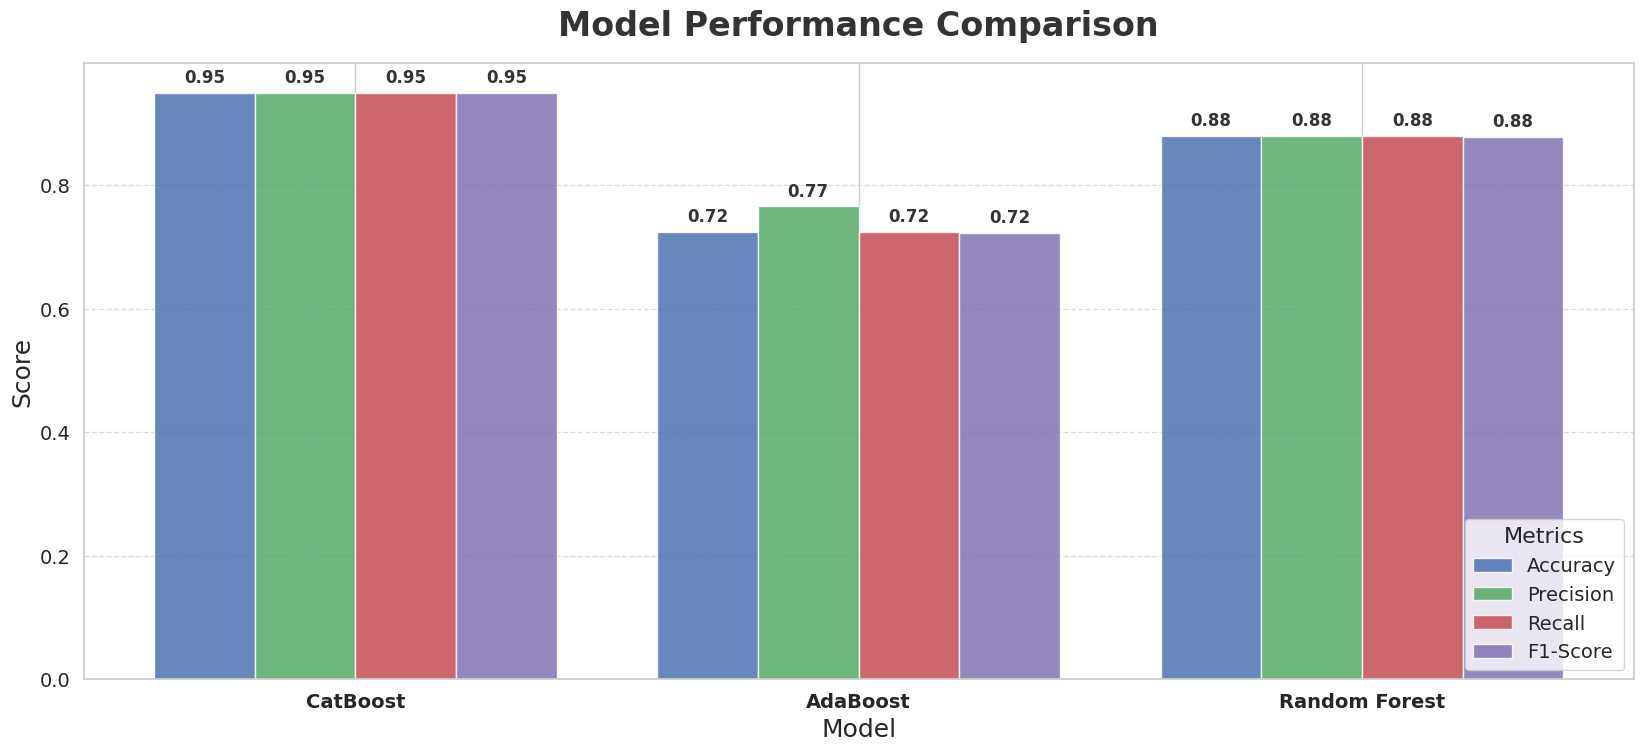

In [50]:
# Convert Results to DataFrame for Plotting
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plot Evaluation Metrics Comparison
# Metrik yang Akan Diplot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df['Model']))  # Lokasi Label Model
width = 0.2  # Lebar Setiap Bar

# Warna yang Konsisten dan Menarik untuk Setiap Metrik
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

# Ukuran Figure
plt.figure(figsize=(20, 8))

# Membuat Bar untuk Setiap Metrik
for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar(
        x + i * width, 
        results_df[metric], 
        width, 
        label=metric, 
        color=color,
        alpha=0.85
    )
    
    # Menampilkan Nilai pada Setiap Bar
    for j, value in enumerate(results_df[metric]):
        plt.text(
            x[j] + i * width, 
            value + 0.01, 
            f"{value:.2f}", 
            ha='center', 
            va='bottom', 
            fontsize=12, 
            fontweight='bold', 
            color='#333333'
        )

# Judul dan Label Sumbu yang Informatif
plt.title('Model Performance Comparison', fontsize=24, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.xticks(x + width * 1.5, results_df['Model'], fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)
plt.legend(title='Metrics', fontsize=14, title_fontsize='16', loc='lower right')

# Grid Horizontal untuk Membantu Membaca Nilai
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan Visualisasi
plt.show()